<a href="https://colab.research.google.com/github/Somaih-Bakr/Iaac24/blob/main/somaih_bakr_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [ ]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
PLACE_NAME = "Sant Adrià de Besòs, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

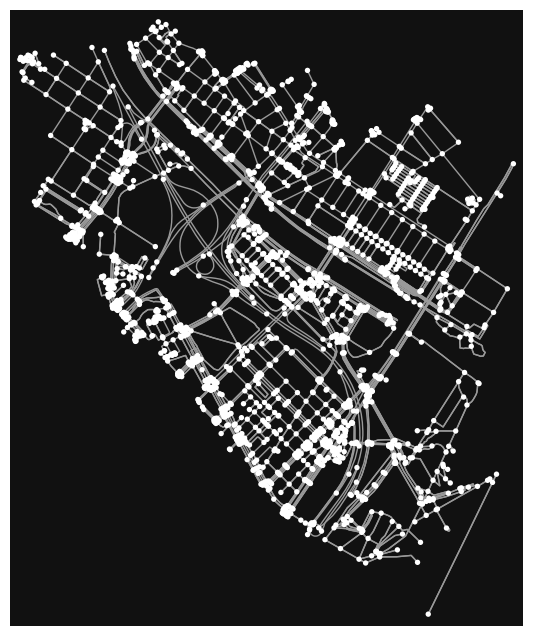

In [ ]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [ ]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-61-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


addr:housenumber addr:postcode  \
element_type osmid                                       
node         2212585957              NaN           NaN   
             9022421699              NaN           NaN   
way          34116527                540         08930   
             34116590                  3         08930   
             34116596                 18         08930   

                                      addr:street  \
element_type osmid                                  
node         2212585957                       NaN   
             9022421699                       NaN   
way          34116527    Avinguda Corts Catalanes   
             34116590    Carrer de la Festa Major   
             34116596         Carrer Pi i Gilbert   

                                                                  geometry  \
element_type osmid                                                           
node         2212585957                           POINT (2.22748 41.42798)   
             9022421699                           POINT (2.22610 41.41727)   
way          34116527    POLYGON ((2.22241 41.42958, 2.22246 41.42962, ...   
             34116590    POLYGON ((2.22394 41.43001, 2.22435 41.42942, ...   
             34116596    POLYGON ((2.22407 41.42829, 2.22412 41.42834, ...   

                        healthcare                                   name  \
element_type osmid                                                          
node         2212585957        NaN  Xemeneia de l'antiga fàbrica C.E.L.O.   
             9022421699        NaN                 RRos Roca medi ambient   
way          34116527          NaN                                    NaN   
             34116590          NaN                                    NaN   
             34116596          NaN                                    NaN   

                                                       name:ca opening_hours  \
element_type osmid                                                             
node         2212585957  Xemeneia de l'antiga fàbrica C.E.L.O.           NaN   
             9022421699                                    NaN           NaN   
way          34116527                                      NaN           NaN   
             34116590                                      NaN           NaN   
             34116596                                      NaN           NaN   

                            building building:colour  ... construction  \
element_type osmid                                    ...                
node         2212585957   industrial         #947350  ...          NaN   
             9022421699   industrial             NaN  ...          NaN   
way          34116527    residential             NaN  ...          NaN   
             34116590    residential             NaN  ...          NaN   
             34116596    residential             NaN  ...          NaN   

                        place_of_mourning shelter_type location underground  \
element_type osmid                                                            
node         2212585957               NaN          NaN      NaN         NaN   
             9022421699               NaN          NaN      NaN         NaN   
way          34116527                 NaN          NaN      NaN         NaN   
             34116590                 NaN          NaN      NaN         NaN   
             34116596                 NaN          NaN      NaN         NaN   

                        est_height ways type site old_name  
element_type osmid                                          
node         2212585957        NaN  NaN  NaN  NaN      NaN  
             9022421699        NaN  NaN  NaN  NaN      NaN  
way          34116527          NaN  NaN  NaN  NaN      NaN  
             34116590          NaN  NaN  NaN  NaN      NaN  
             34116596          NaN  NaN  NaN  NaN      NaN  

[5 rows x 146 columns]

<Axes: >

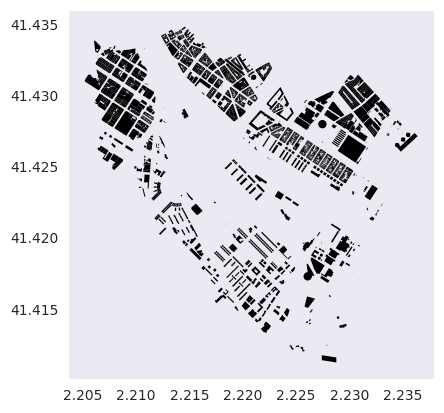

In [ ]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [ ]:
police_stations = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "police"
    }
)
police_stations.head()

<ipython-input-63-0b173770a162>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  police_stations = osmnx.geometries_from_place(


amenity  \
element_type osmid                
node         4610186439  police   
way          480944191   police   
             640349925   police   

                                                                   name  \
element_type osmid                                                        
node         4610186439               Policía Local Sant Adrià de Besós   
way          480944191                                 Policia Nacional   
             640349925   Comissaria dels Mossos d'Esquadra a Sant Adrià   

                                         name:en           operator  \
element_type osmid                                                    
node         4610186439  Sant Adriá Local Police      Policía Local   
way          480944191                       NaN                NaN   
             640349925                       NaN  Mossos d'Esquadra   

                        operator:wikidata  \
element_type osmid                          
node         4610186439          Q1507792   
way          480944191                NaN   
             640349925           Q1424346   

                                                                  geometry  \
element_type osmid                                                           
node         4610186439                           POINT (2.22309 41.42617)   
way          480944191   POLYGON ((2.21874 41.43207, 2.21871 41.43205, ...   
             640349925   POLYGON ((2.21912 41.42008, 2.21917 41.42011, ...   

                                                                     nodes  \
element_type osmid                                                           
node         4610186439                                                NaN   
way          480944191   [6033922482, 6033924194, 6033922474, 603392419...   
             640349925   [1621858788, 6032484129, 6032484125, 603248429...   

                        addr:housenumber addr:postcode  \
element_type osmid                                       
node         4610186439              NaN           NaN   
way          480944191                10         08930   
             640349925                41         08930   

                                       addr:street building building:levels  \
element_type osmid                                                            
node         4610186439                        NaN      NaN             NaN   
way          480944191       Carrer d'Andreu Soler   public               6   
             640349925   Carrer Cristòfol de Moura   public               2   

                                                                name:ca  \
element_type osmid                                                        
node         4610186439                                             NaN   
way          480944191                                 Policia Nacional   
             640349925   Comissaria dels Mossos d'Esquadra a Sant Adrià   

                                   addr:city building:levels:underground  \
element_type osmid                                                         
node         4610186439                  NaN                         NaN   
way          480944191                   NaN                         NaN   
             640349925   Sant Adrià de Besòs                           1   

                        opening_hours  
element_type osmid                     
node         4610186439           NaN  
way          480944191            NaN  
             640349925           24/7

In [ ]:
libraries = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "library"
    }
)
libraries.head()

<ipython-input-64-0ddc0a560ebb>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  libraries = osmnx.geometries_from_place(


geometry  \
element_type osmid                                                          
way          198373313  POLYGON ((2.21505 41.43136, 2.21490 41.43144, ...   
             476159491  POLYGON ((2.21909 41.41901, 2.21870 41.41931, ...   

                                                                    nodes  \
element_type osmid                                                          
way          198373313  [2085100840, 4995102449, 2085100839, 208510084...   
             476159491  [1621858787, 4698055097, 4698055096, 603250733...   

                                  addr:city         addr:housename  \
element_type osmid                                                   
way          198373313  Sant Adrià de Besòs  Biblioteca Sant Adrià   
             476159491                  NaN                    NaN   

                       addr:postcode                       addr:street  \
element_type osmid                                                       
way          198373313         08930  Plaça de Guillermo Vidaña i Haro   
             476159491           NaN                               NaN   

                        amenity building building:levels  \
element_type osmid                                         
way          198373313  library   public               2   
             476159491  library   public               2   

                       building:levels:underground         contact:email  \
element_type osmid                                                         
way          198373313                           1  b.st.adriab@diba.cat   
             476159491                         NaN                   NaN   

                        contact:phone  \
element_type osmid                      
way          198373313  +34 934621479   
             476159491            NaN   

                                                               name  \
element_type osmid                                                    
way          198373313                        Biblioteca Sant Adrià   
             476159491  biblioteca font de la mina. Centre Cultural   

                       nohousenumber  \
element_type osmid                     
way          198373313           yes   
             476159491           NaN   

                                                                  website  \
element_type osmid                                                          
way          198373313  http://www.sant-adria.net/serveis/cultura_bibl...   
             476159491                                                NaN   

                       wheelchair  
element_type osmid                 
way          198373313        yes  
             476159491        NaN

In [ ]:
historic_buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "historic": "building"
    }
)
historic_buildings.head()

<ipython-input-65-ef6f22580f63>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  historic_buildings = osmnx.geometries_from_place(


ways  \
element_type osmid                                                         
relation     13613159  [389346925, 1019264347, 1019264345, 951890646,...   

                                 addr:city addr:country addr:housenumber  \
element_type osmid                                                         
relation     13613159  Sant Adrià de Besòs           ES              106   

                      addr:postcode                  addr:street  \
element_type osmid                                                 
relation     13613159         08930  Avinguda d'Eduard Maristany   

                                          alt_name    building  \
element_type osmid                                               
relation     13613159  Tres Xemeneies de Barcelona  industrial   

                      disused:building heritage  ...  \
element_type osmid                               ...   
relation     13613159              yes        8  ...   

                                                        ref:bcil:website  \
element_type osmid                                                         
relation     13613159  http://invarquit.cultura.gencat.cat/Cerca/Fitx...   

                      ref:ipac      site start_date          type  wikidata  \
element_type osmid                                                            
relation     13613159    20716  building       1970  multipolygon  Q2944655   

                                                     wikimedia_commons  \
element_type osmid                                                       
relation     13613159  Category:Central tèrmica de Sant Adrià de Besòs   

                                                       wikipedia  \
element_type osmid                                                 
relation     13613159  ca:Central tèrmica de Sant Adrià de Besòs   

                                                                   nodes  \
element_type osmid                                                         
relation     13613159  [[[3925239645, 3858975827, 6034385244, 6034385...   

                                                                geometry  
element_type osmid                                                        
relation     13613159  MULTIPOLYGON (((2.23432 41.42649, 2.23431 41.4...  

[1 rows x 30 columns]

In [ ]:
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park"
    }
)
parks.head()

<ipython-input-66-78e9fbb9ccf1>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  parks = osmnx.geometries_from_place(


barrier  \
element_type osmid               
way          54848440      NaN   
             114557702   fence   
             152441700     NaN   
             178429879     NaN   
             240500862     NaN   

                                                                 geometry  \
element_type osmid                                                          
way          54848440   POLYGON ((2.23141 41.42285, 2.23056 41.42192, ...   
             114557702  POLYGON ((2.22517 41.41672, 2.22513 41.41641, ...   
             152441700  POLYGON ((2.21471 41.43128, 2.21447 41.43110, ...   
             178429879  POLYGON ((2.23061 41.42498, 2.23074 41.42510, ...   
             240500862  POLYGON ((2.22536 41.40808, 2.22524 41.40790, ...   

                           highway  \
element_type osmid                   
way          54848440          NaN   
             114557702         NaN   
             152441700  pedestrian   
             178429879         NaN   
             240500862         NaN   

                                                                    nodes  \
element_type osmid                                                          
way          54848440   [690449690, 690449691, 9174081211, 690449692, ...   
             114557702  [1297428846, 8559992228, 1297428925, 853002553...   
             152441700  [1652598874, 1652598872, 1652598862, 165259887...   
             178429879  [1887824447, 9461923884, 9461923883, 188782445...   
             240500862  [2482291706, 4845610802, 4845610803, 248229170...   

                                                           name  \
element_type osmid                                                
way          54848440                          Parc del Litoral   
             114557702           Parc del Campus Diagonal-Besòs   
             152441700                   Passeig de la Rambleta   
             178429879                      Parc Lluís Companys   
             240500862  Parc dels Auditoris - El Parc del Fòrum   

                                                        name:ca leisure  \
element_type osmid                                                        
way          54848440                          Parc del Litoral    park   
             114557702           Parc del Campus Diagonal-Besòs    park   
             152441700                   Passeig de la Rambleta    park   
             178429879                      Parc Lluís Companys    park   
             240500862  Parc dels Auditoris - El Parc del Fòrum    park   

                                                                  website  \
element_type osmid                                                          
way          54848440   https://www.amb.cat/web/mmamb/parcs/parc_del_l...   
             114557702                                                NaN   
             152441700                                                NaN   
             178429879                                                NaN   
             240500862                                                NaN   

                       fence_type  lit surface   wikidata  \
element_type osmid                                          
way          54848440         NaN  NaN     NaN        NaN   
             114557702      metal  yes     NaN        NaN   
             152441700        NaN  yes     NaN        NaN   
             178429879        NaN  NaN     NaN        NaN   
             240500862        NaN  NaN     NaN  Q11697775   

                              wikimedia_commons          wikipedia source  \
element_type osmid                                                          
way          54848440                       NaN                NaN    NaN   
             114557702                      NaN                NaN    NaN   
             152441700                      NaN                NaN    NaN   
             178429879                      NaN                NaN    NaN   
           

In [ ]:
trees = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "natural": "tree"
    }
)
trees.head()

<ipython-input-67-4eb0eaa40d5a>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  trees = osmnx.geometries_from_place(


natural                  geometry trees denotation  \
element_type osmid                                                           
node         3944729097    tree  POINT (2.21648 41.43334)   NaN        NaN   
             3944729100    tree  POINT (2.21497 41.43334)   NaN        NaN   
             3944729101    tree  POINT (2.21532 41.43334)   NaN        NaN   
             3944729102    tree  POINT (2.21536 41.43334)   NaN        NaN   
             3944729104    tree  POINT (2.21375 41.43335)   NaN        NaN   

                        object:city object:street species genus leaf_cycle  \
element_type osmid                                                           
node         3944729097         NaN           NaN     NaN   NaN        NaN   
             3944729100         NaN           NaN     NaN   NaN        NaN   
             3944729101         NaN           NaN     NaN   NaN        NaN   
             3944729102         NaN           NaN     NaN   NaN        NaN   
             3944729104         NaN           NaN     NaN   NaN        NaN   

                        leaf_type species:ca taxon taxon:genus est_height  \
element_type osmid                                                          
node         3944729097       NaN        NaN   NaN         NaN        NaN   
             3944729100       NaN        NaN   NaN         NaN        NaN   
             3944729101       NaN        NaN   NaN         NaN        NaN   
             3944729102       NaN        NaN   NaN         NaN        NaN   
             3944729104       NaN        NaN   NaN         NaN        NaN   

                        taxon:family image source  
element_type osmid                                 
node         3944729097          NaN   NaN    NaN  
             3944729100          NaN   NaN    NaN  
             3944729101          NaN   NaN    NaN  
             3944729102          NaN   NaN    NaN  
             3944729104          NaN   NaN    NaN

### 🎢 Putting it all together in one map

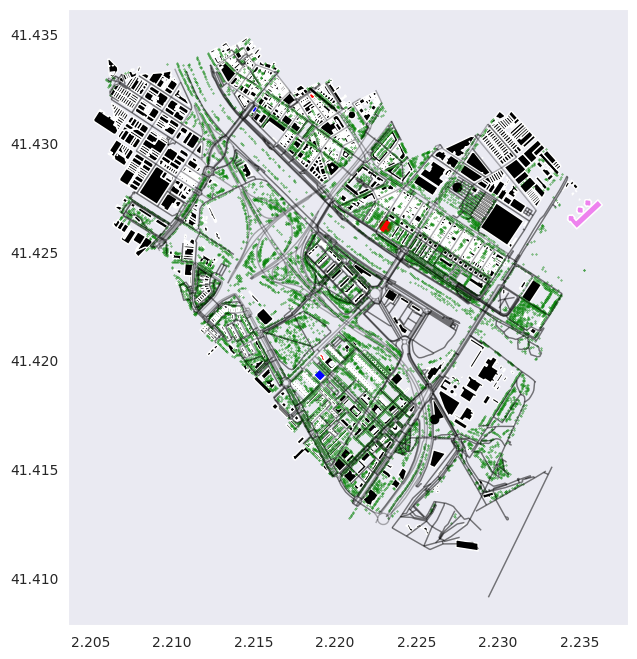

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot police stations
police_stations.plot(ax=ax, color="red", markersize=60)

# Plot libraries
libraries.plot(ax=ax, color="blue", markersize=60)

# Plot trees
trees.plot(ax=ax, color="green", markersize=0.1)

# Plot historic buildings
historic_buildings.plot(ax=ax, color="violet", markersize=60)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

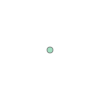

In [ ]:
coords = ((2.23570, 41.42684))
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.2357 41.42684


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

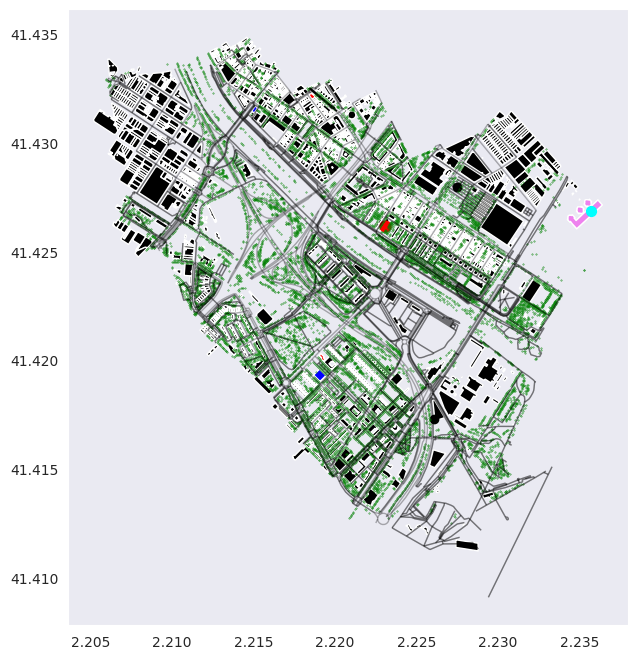

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot police stations
police_stations.plot(ax=ax, color="red", markersize=60)

# Plot libraries
libraries.plot(ax=ax, color="blue", markersize=60)

# Plot trees
trees.plot(ax=ax, color="green", markersize=0.1)

# Plot hisotic buildings
historic_buildings.plot(ax=ax, color="violet", markersize=60)

# Plot Factory
geom.plot(ax=ax, color="cyan", markersize=50)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Central tèrmica de Sant Adrià de Besòs"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


geometry                                            address
0  POINT (2.23570 41.42684)  Central tèrmica de Sant Adrià de Besòs, 106, A...

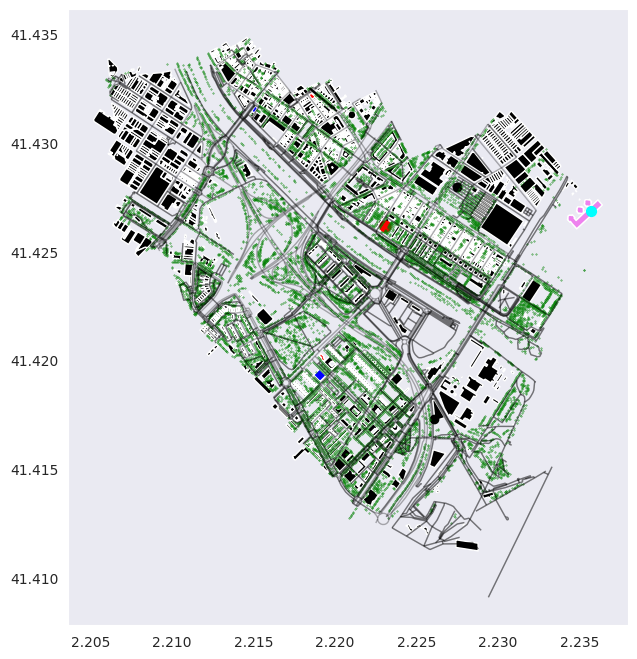

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot police stations
police_stations.plot(ax=ax, color="red", markersize=60)

# Plot libraries
libraries.plot(ax=ax, color="blue", markersize=60)

# Plot trees
trees.plot(ax=ax, color="green", markersize=0.1)

# Plot historic buildings
historic_buildings.plot(ax=ax, color="violet", markersize=60)

# Plot Factory
geocoded_addresses.plot(ax=ax, color="cyan", markersize=50)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many police stations lie within 15 minutes fast walk (2 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 2)

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

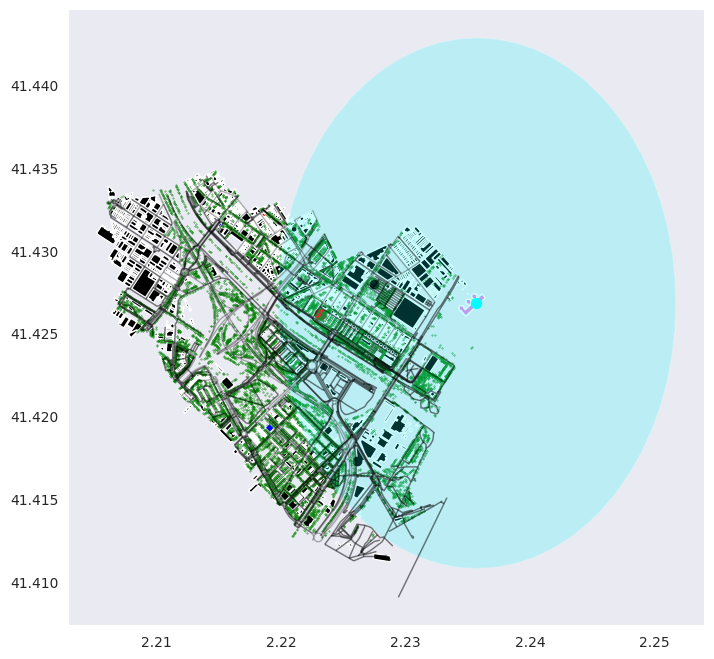

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot police stations
police_stations.plot(ax=ax, color="red", markersize=60)

# Plot libraries
libraries.plot(ax=ax, color="blue", markersize=60)

# Plot trees
trees.plot(ax=ax, color="green", markersize=0.1)

# Plot historic buildings
historic_buildings.plot(ax=ax, color="violet", markersize=60)

# Plot Factory
geom.plot(ax=ax, color="cyan", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="cyan", alpha=0.2)

plt.show()

In [ ]:
accessible_police_stations = [r for r in police_stations["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_police_stations = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_police_stations,
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


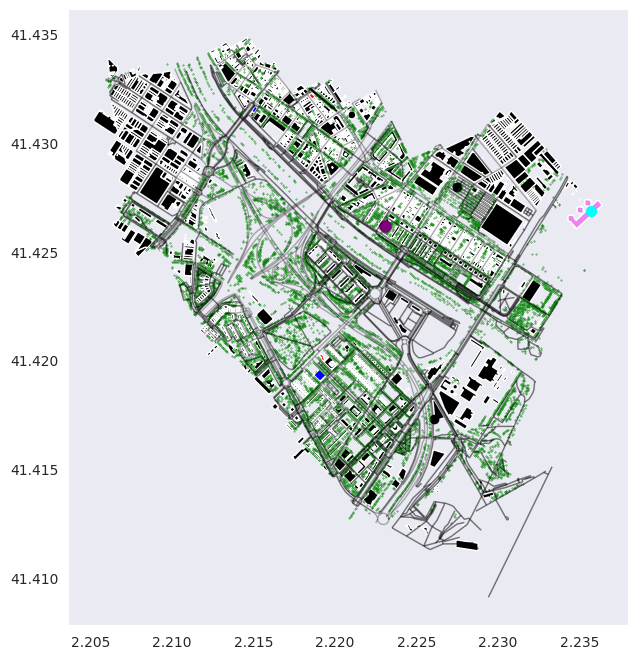

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot police stations
police_stations.plot(ax=ax, color="red", markersize=60)

# Plot libraries
libraries.plot(ax=ax, color="blue", markersize=60)

# Plot trees
trees.plot(ax=ax, color="green", markersize=0.1)

# Plot historic buildings
historic_buildings.plot(ax=ax, color="violet", markersize=60)

# Plot Factory
geom.plot(ax=ax, color="cyan", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="cyan", alpha=0.2)

accessible_police_stations.plot(ax=ax, facecolor="purple", markersize=60, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

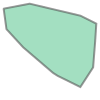

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 2026,
 'm': 5256,
 'k_avg': 5.188548864758144,
 'edge_length_total': 244044.93000000145,
 'edge_length_avg': 46.43168378995461,
 'streets_per_node_avg': 3.1855873642645607,
 'streets_per_node_counts': {0: 0,
  1: 199,
  2: 11,
  3: 1056,
  4: 738,
  5: 20,
  6: 1,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09822309970384994,
  2: 0.005429417571569595,
  3: 0.5212240868706811,
  4: 0.36426456071076013,
  5: 0.009871668311944718,
  6: 0.0004935834155972359,
  7: 0.0004935834155972359},
 'intersection_count': 1827,
 'street_length_total': 150824.67100000023,
 'street_segment_count': 3133,
 'street_length_avg': 48.14065464411115,
 'circuity_avg': 1.050890531497894,
 'self_loop_proportion': 0.000957548675390999,
 'node_density_km': 4494693046286.944,
 'intersection_density_km': 4053210363063.3003,
 'edge_density_km': 541415128258929.2,
 'street_density_km': 334605429393986.75}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Central tèrmica de Sant Adrià de Besòs")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Plaça de Mossèn Anton")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

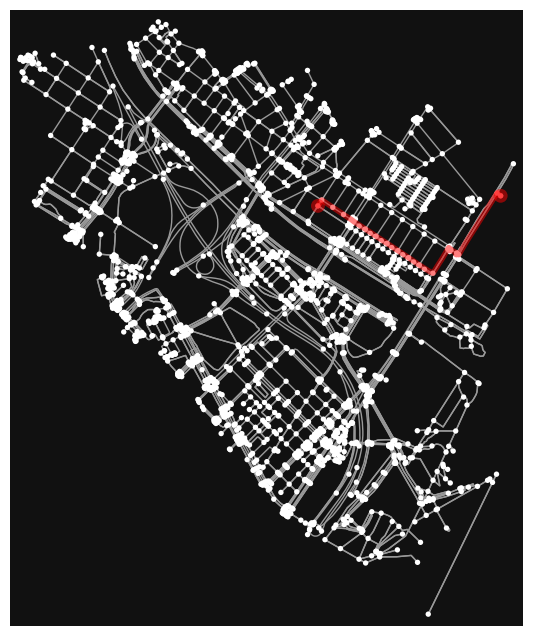

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-116-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.013247
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

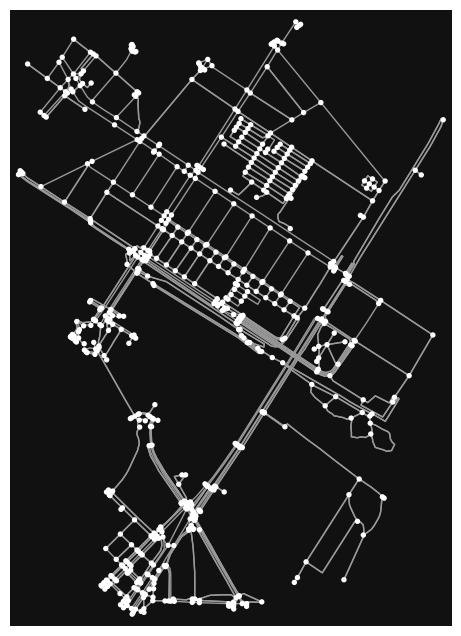

In [ ]:
# getting Central tèrmica de Sant Adrià de Besòs node from the graph:
termica_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, termica_node, max_dist=1500)
figure, ax = osmnx.plot_graph(g)


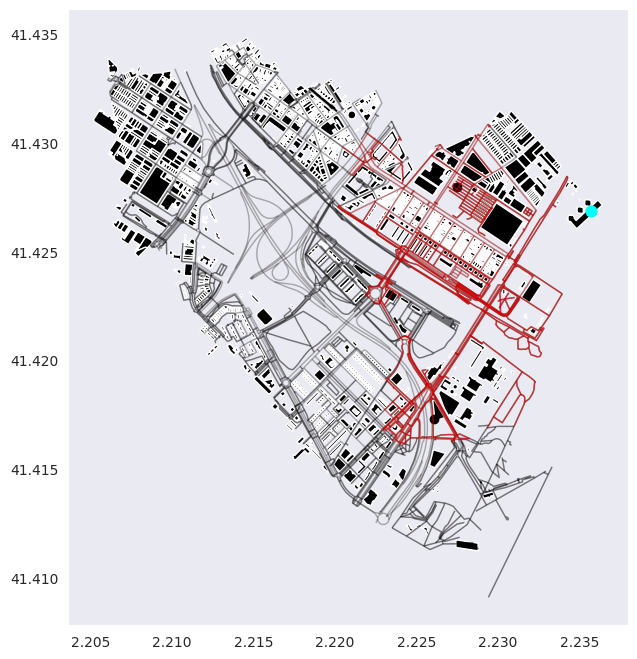

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")
geom.plot(ax=ax, facecolor="cyan", markersize=60)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

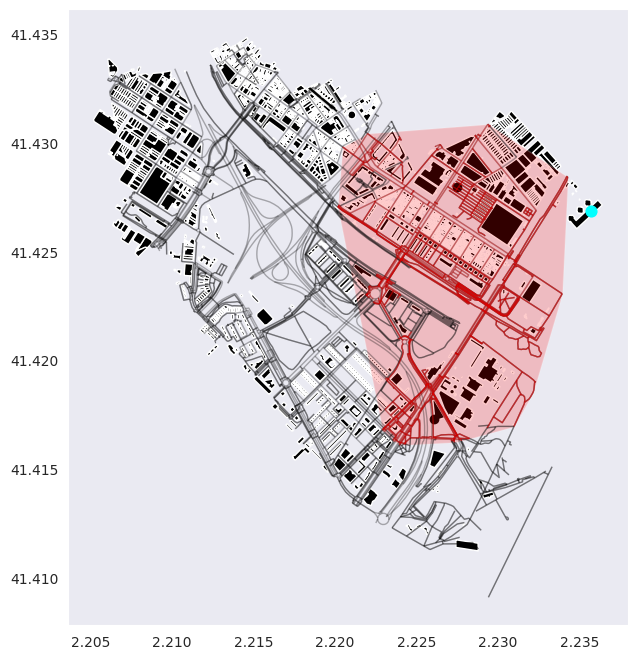

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="black")
geom.plot(ax=ax, facecolor="cyan", markersize=60)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.